In [1]:
import csv
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score
from sklearn.gaussian_process import GaussianProcessClassifier

In [2]:
class data_objects:
    def __init__(self,clip_no,stime,etime,weights_data,label):
        self.clip_no = clip_no
        self.stime = stime
        self.etime = etime
        self.weights_data = weights_data
        self.label = label

In [3]:
total_data_objects = []
with open("E:\\Study\\Sem Project\\Data\\hdp_data.csv",'r') as file:
    reader = csv.reader(file)
    for row in reader:
        #from csv file all items will be read as strings, so we have to convert to int if neccesary
        total_data_objects.append(data_objects(row[0],row[1],row[2],np.asarray(list(map(float,row[4:]))),int(row[3])))

In [4]:
#printing objects value.
print("total no of objects",len(total_data_objects))
for i in range(len(total_data_objects)):
    print("clip no=",total_data_objects[i].clip_no)
    print("start time=",total_data_objects[i].stime)
    print("end time=",total_data_objects[i].etime)
    print("weights =",total_data_objects[i].weights_data)
    print("label = ",total_data_objects[i].label,"\n")

total no of objects 1327
clip no= 1
start time= 0:00:00
end time= 0:00:02
weights = [0.01888867 0.43213707 0.24693547 ... 0.43296211 0.06525018 0.08862337]
label =  -1 

clip no= 2
start time= 0:00:02
end time= 0:00:04
weights = [0.01810735 0.15675295 0.3362437  ... 0.28727857 0.29446053 0.39702544]
label =  -1 

clip no= 3
start time= 0:00:04
end time= 0:00:06
weights = [0.02052948 0.5122491  0.14924855 ... 0.5443531  0.07302298 0.36355011]
label =  -1 

clip no= 4
start time= 0:00:06
end time= 0:00:08
weights = [0.01894811 0.49243422 0.21963915 ... 0.04299025 0.27555195 0.10339427]
label =  -1 

clip no= 5
start time= 0:00:08
end time= 0:00:10
weights = [0.02130355 0.65023463 0.17007732 ... 0.15418828 0.1670373  0.02231296]
label =  -1 

clip no= 6
start time= 0:00:10
end time= 0:00:12
weights = [0.02068193 0.5050292  0.02428025 ... 0.02083966 0.02325586 0.02325586]
label =  -1 

clip no= 7
start time= 0:00:12
end time= 0:00:14
weights = [0.01894128 0.42805503 0.46882218 ... 0.288716

end time= 0:04:28
weights = [0.02128015 0.63172024 0.03930057 ... 0.36599438 0.44028488 0.17542214]
label =  -1 

clip no= 135
start time= 0:04:28
end time= 0:04:30
weights = [0.02225223 0.73235271 0.06875573 ... 0.31097174 0.6424221  0.02574712]
label =  -1 

clip no= 136
start time= 0:04:30
end time= 0:04:32
weights = [0.01915596 0.04540198 0.25905835 ... 0.88682836 0.07034757 0.01909779]
label =  -1 

clip no= 137
start time= 0:04:32
end time= 0:04:34
weights = [0.01962807 0.51360067 0.38378951 ... 0.8133223  0.11906745 0.02230631]
label =  -1 

clip no= 138
start time= 0:04:34
end time= 0:04:36
weights = [0.02072853 0.3474313  0.63184017 ... 0.12017143 0.55405352 0.3032474 ]
label =  -1 

clip no= 139
start time= 0:04:36
end time= 0:04:38
weights = [0.01924814 0.05254653 0.46999955 ... 0.02142773 0.70475045 0.27382182]
label =  -1 

clip no= 140
start time= 0:04:38
end time= 0:04:40
weights = [0.01851519 0.41697331 0.41642466 ... 0.14878184 0.04197773 0.03997879]
label =  -1 

clip

start time= 0:07:28
end time= 0:07:30
weights = [0.02099553 0.54983479 0.42916969 ... 0.03879425 0.02242006 0.23737233]
label =  -1 

clip no= 226
start time= 0:07:30
end time= 0:07:32
weights = [0.01993679 0.34710999 0.01826895 ... 0.85534879 0.0227997  0.0505966 ]
label =  -1 

clip no= 227
start time= 0:07:32
end time= 0:07:34
weights = [0.01794626 0.37886298 0.2186985  ... 0.72539199 0.02634447 0.22617694]
label =  -1 

clip no= 228
start time= 0:07:34
end time= 0:07:36
weights = [0.02241042 0.25418159 0.1886504  ... 0.02227149 0.15829887 0.02485369]
label =  -1 

clip no= 229
start time= 0:07:36
end time= 0:07:38
weights = [0.01870059 0.36135608 0.03454139 ... 0.90725486 0.02081865 0.04804304]
label =  -1 

clip no= 230
start time= 0:07:38
end time= 0:07:40
weights = [0.01820372 0.05962276 0.21789845 ... 0.17349169 0.10806721 0.36576596]
label =  -1 

clip no= 231
start time= 0:07:40
end time= 0:07:42
weights = [0.01957899 0.56872872 0.32092549 ... 0.02419383 0.09677533 0.02419383

clip no= 316
start time= 0:10:30
end time= 0:10:32
weights = [0.01857961 0.39641331 0.46643585 ... 0.55366519 0.01717324 0.05989167]
label =  1 

clip no= 317
start time= 0:10:32
end time= 0:10:34
weights = [0.01893689 0.43306494 0.42705015 ... 0.59275992 0.19758664 0.06328113]
label =  1 

clip no= 318
start time= 0:10:34
end time= 0:10:36
weights = [0.02106484 0.55921814 0.2410423  ... 0.11276045 0.08669375 0.03836447]
label =  1 

clip no= 319
start time= 0:10:36
end time= 0:10:38
weights = [0.01979655 0.40444915 0.53882205 ... 0.02250712 0.02089946 0.05663081]
label =  -1 

clip no= 320
start time= 0:10:38
end time= 0:10:40
weights = [0.02119516 0.68555314 0.24159211 ... 0.02432795 0.93191381 0.04375824]
label =  -1 

clip no= 321
start time= 0:10:40
end time= 0:10:42
weights = [0.01876328 0.37866378 0.37550825 ... 0.01843572 0.0225595  0.01948321]
label =  -1 

clip no= 322
start time= 0:10:42
end time= 0:10:44
weights = [0.02098273 0.17424393 0.02523771 ... 0.09079331 0.05217227 


clip no= 407
start time= 0:13:32
end time= 0:13:34
weights = [0.01941665 0.48785614 0.30687725 ... 0.43207764 0.03470503 0.04115025]
label =  -1 

clip no= 408
start time= 0:13:34
end time= 0:13:36
weights = [0.02088282 0.60135038 0.06362675 ... 0.05429527 0.01743629 0.05230886]
label =  -1 

clip no= 409
start time= 0:13:36
end time= 0:13:38
weights = [0.01782132 0.16620051 0.02109468 ... 0.02060757 0.02373784 0.02373784]
label =  -1 

clip no= 410
start time= 0:13:38
end time= 0:13:40
weights = [0.01786866 0.33365376 0.07326856 ... 0.02239946 0.58154601 0.08156326]
label =  -1 

clip no= 411
start time= 0:13:40
end time= 0:13:42
weights = [0.0198913  0.19715316 0.12595896 ... 0.01618317 0.02476149 0.97523851]
label =  -1 

clip no= 412
start time= 0:13:42
end time= 0:13:44
weights = [0.02366096 0.84121351 0.04182457 ... 0.13203699 0.14008803 0.04002515]
label =  -1 

clip no= 413
start time= 0:13:44
end time= 0:13:46
weights = [0.02129005 0.71294541 0.04946272 ... 0.01502803 0.02515

weights = [0.01944607 0.51659299 0.14739553 ... 0.07464642 0.07775669 0.01521326]
label =  -1 

clip no= 530
start time= 0:17:38
end time= 0:17:40
weights = [0.02479905 0.95026172 0.02493923 ... 0.60406845 0.04613889 0.02405814]
label =  -1 

clip no= 531
start time= 0:17:40
end time= 0:17:42
weights = [0.02198767 0.74464713 0.14001912 ... 0.02421143 0.06105491 0.01950365]
label =  -1 

clip no= 532
start time= 0:17:42
end time= 0:17:44
weights = [0.01977617 0.01895908 0.47845347 ... 0.67998442 0.27666033 0.02213283]
label =  -1 

clip no= 533
start time= 0:17:44
end time= 0:17:46
weights = [0.01954018 0.47839081 0.25568289 ... 0.46584703 0.16779687 0.02083752]
label =  -1 

clip no= 534
start time= 0:17:46
end time= 0:17:48
weights = [0.02391903 0.77451931 0.20156165 ... 0.01944373 0.60053207 0.3800242 ]
label =  -1 

clip no= 535
start time= 0:17:48
end time= 0:17:50
weights = [0.01971908 0.30410271 0.49313953 ... 0.02190747 0.02129892 0.03651244]
label =  -1 

clip no= 536
start tim

clip no= 634
start time= 0:21:06
end time= 0:21:08
weights = [0.02273507 0.15104933 0.59586019 ... 0.74299071 0.17865014 0.05631363]
label =  -1 

clip no= 635
start time= 0:21:08
end time= 0:21:10
weights = [0.02170924 0.1131466  0.1697199  ... 0.9742082  0.02528785 0.97471215]
label =  -1 

clip no= 636
start time= 0:21:10
end time= 0:21:12
weights = [0.0192067  0.27456247 0.41733495 ... 0.02069324 0.05224195 0.02182711]
label =  -1 

clip no= 637
start time= 0:21:12
end time= 0:21:14
weights = [0.01917423 0.18830215 0.04874386 ... 0.77008221 0.05354478 0.092618  ]
label =  -1 

clip no= 638
start time= 0:21:14
end time= 0:21:16
weights = [0.02053417 0.47649765 0.02237078 ... 0.02482311 0.95226767 0.02290922]
label =  -1 

clip no= 639
start time= 0:21:16
end time= 0:21:18
weights = [0.02088402 0.15603188 0.63049617 ... 0.24671059 0.65231038 0.08062809]
label =  -1 

clip no= 640
start time= 0:21:18
end time= 0:21:20
weights = [0.02088778 0.02299412 0.6477611  ... 0.50246045 0.275224

clip no= 725
start time= 0:24:08
end time= 0:24:10
weights = [0.02005727 0.03174652 0.49421609 ... 0.38941062 0.53494792 0.01838883]
label =  -1 

clip no= 726
start time= 0:24:10
end time= 0:24:12
weights = [0.01946896 0.14215426 0.34679391 ... 0.02202763 0.79130544 0.18666692]
label =  -1 

clip no= 727
start time= 0:24:12
end time= 0:24:14
weights = [0.0191344  0.45930353 0.01996972 ... 0.63732814 0.25681036 0.08560345]
label =  -1 

clip no= 728
start time= 0:24:14
end time= 0:24:16
weights = [0.01971036 0.51575887 0.023131   ... 0.04702227 0.02531359 0.97468641]
label =  -1 

clip no= 729
start time= 0:24:16
end time= 0:24:18
weights = [0.02382917 0.77334621 0.02475148 ... 0.02156371 0.23851078 0.7399255 ]
label =  -1 

clip no= 730
start time= 0:24:18
end time= 0:24:20
weights = [0.01825131 0.04335065 0.12348367 ... 0.43197325 0.04614869 0.02523757]
label =  -1 

clip no= 731
start time= 0:24:20
end time= 0:24:22
weights = [0.02036792 0.11901605 0.53557221 ... 0.4793567  0.399463

label =  1 

clip no= 816
start time= 0:27:10
end time= 0:27:12
weights = [0.01805052 0.4517308  0.32203466 ... 0.05832954 0.01634995 0.03197323]
label =  1 

clip no= 817
start time= 0:27:12
end time= 0:27:14
weights = [0.01781949 0.13052601 0.10227784 ... 0.66404929 0.28775469 0.02845926]
label =  1 

clip no= 818
start time= 0:27:14
end time= 0:27:16
weights = [0.01975144 0.37020703 0.5519653  ... 0.45332204 0.10265445 0.42524253]
label =  -1 

clip no= 819
start time= 0:27:16
end time= 0:27:18
weights = [0.01929394 0.58075671 0.18375505 ... 0.09817787 0.51619742 0.28466769]
label =  -1 

clip no= 820
start time= 0:27:18
end time= 0:27:20
weights = [0.01960665 0.2924341  0.34706465 ... 0.17139175 0.02016373 0.03895267]
label =  -1 

clip no= 821
start time= 0:27:20
end time= 0:27:22
weights = [0.02234674 0.76565644 0.14356058 ... 0.18177605 0.01627008 0.02635753]
label =  -1 

clip no= 822
start time= 0:27:22
end time= 0:27:24
weights = [0.02012764 0.12049643 0.54223392 ... 0.202335

label =  -1 

clip no= 907
start time= 0:30:12
end time= 0:30:14
weights = [0.02197953 0.70853071 0.21017091 ... 0.72479355 0.23354459 0.01946205]
label =  -1 

clip no= 908
start time= 0:30:14
end time= 0:30:16
weights = [0.01882423 0.2458976  0.36540727 ... 0.50001421 0.05951256 0.04858168]
label =  -1 

clip no= 909
start time= 0:30:16
end time= 0:30:18
weights = [0.01918104 0.08964215 0.45194584 ... 0.63839983 0.02340255 0.06945273]
label =  -1 

clip no= 910
start time= 0:30:18
end time= 0:30:20
weights = [0.02096524 0.5959342  0.38310056 ... 0.05070596 0.44932948 0.48053291]
label =  -1 

clip no= 911
start time= 0:30:20
end time= 0:30:22
weights = [0.01874496 0.1726548  0.3667574  ... 0.03468802 0.19808687 0.09350684]
label =  1 

clip no= 912
start time= 0:30:22
end time= 0:30:24
weights = [0.01943066 0.55453555 0.33820104 ... 0.02138038 0.02138038 0.05048145]
label =  1 

clip no= 913
start time= 0:30:24
end time= 0:30:26
weights = [0.02060647 0.1564126  0.53466037 ... 0.02245

label =  1 

clip no= 1019
start time= 0:33:56
end time= 0:33:58
weights = [0.01882907 0.30446524 0.4391211  ... 0.62377007 0.02357103 0.02062466]
label =  -1 

clip no= 1020
start time= 0:33:58
end time= 0:34:00
weights = [0.02009187 0.40544255 0.18920652 ... 0.4247725  0.51591802 0.03810758]
label =  -1 

clip no= 1021
start time= 0:34:00
end time= 0:34:02
weights = [0.01697165 0.38207837 0.28655877 ... 0.02626633 0.9462933  0.02744037]
label =  -1 

clip no= 1022
start time= 0:34:02
end time= 0:34:04
weights = [0.01976152 0.04448626 0.4605268  ... 0.27347665 0.07226713 0.01745087]
label =  -1 

clip no= 1023
start time= 0:34:04
end time= 0:34:06
weights = [0.02018177 0.52554521 0.22794732 ... 0.04555507 0.02367665 0.02221513]
label =  -1 

clip no= 1024
start time= 0:34:06
end time= 0:34:08
weights = [0.01909356 0.03668831 0.01768111 ... 0.01957146 0.39870584 0.58172271]
label =  -1 

clip no= 1025
start time= 0:34:08
end time= 0:34:10
weights = [0.01984006 0.11717282 0.32138831 ...

start time= 0:37:38
end time= 0:37:40
weights = [0.01930839 0.34009455 0.17822534 ... 0.70390582 0.1326572  0.12394738]
label =  1 

clip no= 1131
start time= 0:37:40
end time= 0:37:42
weights = [0.02018423 0.56309558 0.29218096 ... 0.1750325  0.60697141 0.19824469]
label =  1 

clip no= 1132
start time= 0:37:42
end time= 0:37:44
weights = [0.02183528 0.6879292  0.11263046 ... 0.22892719 0.02228738 0.014408  ]
label =  1 

clip no= 1133
start time= 0:37:44
end time= 0:37:46
weights = [0.02150312 0.72559455 0.0815814  ... 0.03905838 0.06495101 0.01661103]
label =  1 

clip no= 1134
start time= 0:37:46
end time= 0:37:48
weights = [0.01972692 0.07102085 0.04734723 ... 0.12307574 0.04131829 0.01701341]
label =  1 

clip no= 1135
start time= 0:37:48
end time= 0:37:50
weights = [0.02339997 0.83018092 0.08082185 ... 0.02457942 0.95467605 0.02074453]
label =  1 

clip no= 1136
start time= 0:37:50
end time= 0:37:52
weights = [0.01971377 0.0413278  0.31432408 ... 0.02314924 0.13308983 0.84376092

start time= 0:42:18
end time= 0:42:20
weights = [0.01887254 0.01766974 0.46991968 ... 0.5420215  0.04218689 0.28578219]
label =  -1 

clip no= 1271
start time= 0:42:20
end time= 0:42:22
weights = [0.01977614 0.25558239 0.51798031 ... 0.02050349 0.05941353 0.08606404]
label =  -1 

clip no= 1272
start time= 0:42:22
end time= 0:42:24
weights = [0.02028963 0.35787428 0.53281728 ... 0.04191839 0.10862998 0.02407475]
label =  -1 

clip no= 1273
start time= 0:42:24
end time= 0:42:26
weights = [0.01802825 0.39770873 0.35289647 ... 0.03669764 0.1218886  0.08532202]
label =  1 

clip no= 1274
start time= 0:42:26
end time= 0:42:28
weights = [0.01942307 0.28590964 0.51681572 ... 0.06642449 0.01820671 0.04256781]
label =  1 

clip no= 1275
start time= 0:42:28
end time= 0:42:30
weights = [0.02212649 0.7187878  0.2390705  ... 0.19435014 0.08005751 0.0162493 ]
label =  1 

clip no= 1276
start time= 0:42:30
end time= 0:42:32
weights = [0.01792407 0.38497016 0.38497016 ... 0.20914141 0.01829085 0.02064

In [5]:
max_len = len(total_data_objects[0].weights_data)
for i in range(len(total_data_objects)):
    if max_len < len(total_data_objects[i].weights_data):
        max_len = len(total_data_objects[i].weights_data)
        
for i in range(len(total_data_objects)):
    for j in range(max_len - len(total_data_objects[i].weights_data)):
        total_data_objects[i].weights_data = np.append(total_data_objects[i].weights_data,np.mean(total_data_objects[i].weights_data))

In [6]:
# normalizing weights.
for i in range(len(total_data_objects)):
    sum = np.sum(total_data_objects[i].weights_data)
    for j in range(len(total_data_objects[i].weights_data)):
        total_data_objects[i].weights_data[j] = total_data_objects[i].weights_data[j] / sum
    total_data_objects[i].weights_data = np.asarray(total_data_objects[i].weights_data)

In [7]:
def kernel(X1, X2, l=1.0, sigma_f=1.0):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

In [8]:
#Guassian process regression
#Input:X1: Array of m points (m x d),X2: Array of n points (n x d).
#Output: Covariance matrix (m x n).

def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    #equation(6)
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    #equation(4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)
    #equation(5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)    
    return mu_s, cov_s

In [9]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  2
feature length 5
train length 791
accuracy = 86.81732580037664
confusion matrix [[461  70]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 86.81732580037664
confusion matrix [[461  70]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 86.81732580037664
confusion matrix [[461  70]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 86.81732580037664
confusion matrix [[461  70]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 86.81732580037664
confusion matrix [[461  70]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 86.81732580037664
confusion matrix [[461  70]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 86.81732580037664
confusion matrix [[461  70]
 [  0   0]]
total no of queries  0
feature lengt

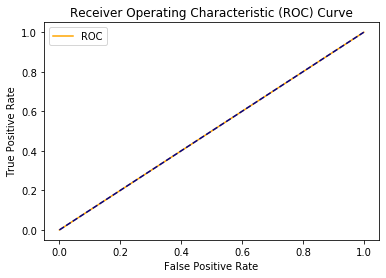

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  3
feature length 6
train length 790
accuracy = 83.9924670433145
confusion matrix [[446  85]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 83.9924670433145
confusion matrix [[446  85]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 83.9924670433145
confusion matrix [[446  85]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 83.9924670433145
confusion matrix [[446  85]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 83.9924670433145
confusion matrix [[446  85]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 83.9924670433145
confusion matrix [[446  85]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 83.9924670433145
confusion matrix [[446  85]
 [  0   0]]
total no of queries  0
feature length 6
tra

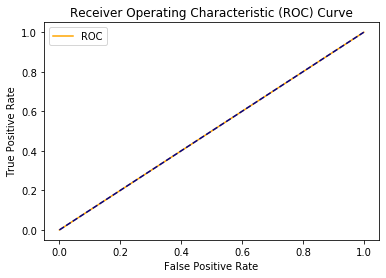

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  2
feature length 5
train length 791
accuracy = 85.68738229755178
confusion matrix [[455  76]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 85.68738229755178
confusion matrix [[455  76]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 85.68738229755178
confusion matrix [[455  76]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 85.68738229755178
confusion matrix [[455  76]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 85.68738229755178
confusion matrix [[455  76]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 85.68738229755178
confusion matrix [[455  76]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 85.68738229755178
confusion matrix [[455  76]
 [  0   0]]
total no of queries  0
feature lengt

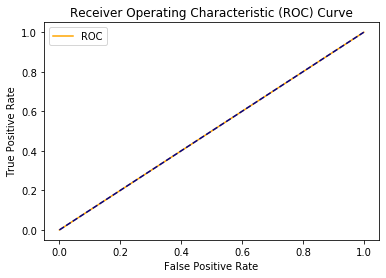

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  3
feature length 6
train length 790
accuracy = 84.7457627118644
confusion matrix [[450  81]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 84.7457627118644
confusion matrix [[450  81]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 84.7457627118644
confusion matrix [[450  81]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 84.7457627118644
confusion matrix [[450  81]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 84.7457627118644
confusion matrix [[450  81]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 84.7457627118644
confusion matrix [[450  81]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 84.7457627118644
confusion matrix [[450  81]
 [  0   0]]
total no of queries  0
feature length 6
tra

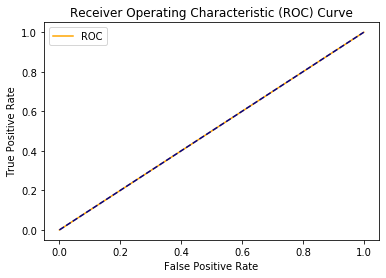

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  2
feature length 5
train length 791
accuracy = 84.55743879472693
confusion matrix [[449  82]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 84.55743879472693
confusion matrix [[449  82]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 84.55743879472693
confusion matrix [[449  82]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 84.55743879472693
confusion matrix [[449  82]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 84.55743879472693
confusion matrix [[449  82]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 84.55743879472693
confusion matrix [[449  82]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 84.55743879472693
confusion matrix [[449  82]
 [  0   0]]
total no of queries  0
feature lengt

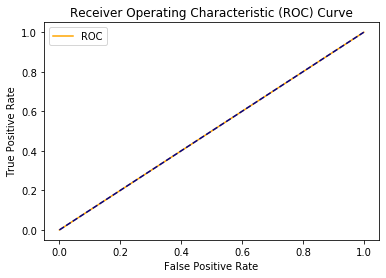

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  3
feature length 6
train length 790
accuracy = 82.86252354048965
confusion matrix [[440  91]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 82.86252354048965
confusion matrix [[440  91]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 82.86252354048965
confusion matrix [[440  91]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 82.86252354048965
confusion matrix [[440  91]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 82.86252354048965
confusion matrix [[440  91]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 82.86252354048965
confusion matrix [[440  91]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 82.86252354048965
confusion matrix [[440  91]
 [  0   0]]
total no of queries  0
feature lengt

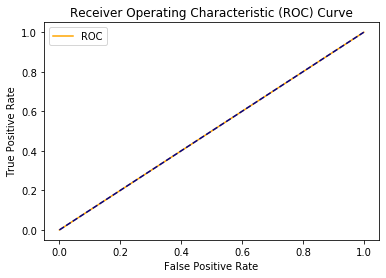

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  3
feature length 6
train length 790
accuracy = 84.93408662900188
confusion matrix [[451  80]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 84.93408662900188
confusion matrix [[451  80]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 84.93408662900188
confusion matrix [[451  80]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 84.93408662900188
confusion matrix [[451  80]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 84.93408662900188
confusion matrix [[451  80]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 84.93408662900188
confusion matrix [[451  80]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 84.93408662900188
confusion matrix [[451  80]
 [  0   0]]
total no of queries  0
feature lengt

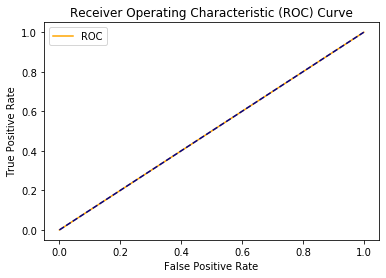

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  3
feature length 6
train length 790
accuracy = 87.57062146892656
confusion matrix [[465  66]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 87.57062146892656
confusion matrix [[465  66]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 87.57062146892656
confusion matrix [[465  66]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 87.57062146892656
confusion matrix [[465  66]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 87.57062146892656
confusion matrix [[465  66]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 87.57062146892656
confusion matrix [[465  66]
 [  0   0]]
total no of queries  0
feature length 6
train length 790
accuracy = 87.57062146892656
confusion matrix [[465  66]
 [  0   0]]
total no of queries  0
feature lengt

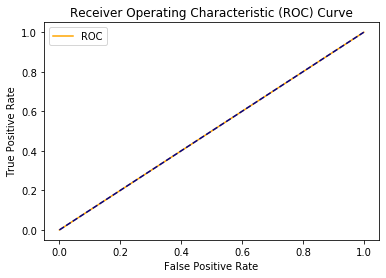

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  19
feature length 22
train length 774
accuracy = 86.4406779661017
confusion matrix [[459  72]
 [  0   0]]
total no of queries  0
feature length 22
train length 774
accuracy = 86.4406779661017
confusion matrix [[459  72]
 [  0   0]]
total no of queries  0
feature length 22
train length 774
accuracy = 86.4406779661017
confusion matrix [[459  72]
 [  0   0]]
total no of queries  0
feature length 22
train length 774
accuracy = 86.4406779661017
confusion matrix [[459  72]
 [  0   0]]
total no of queries  0
feature length 22
train length 774
accuracy = 86.4406779661017
confusion matrix [[459  72]
 [  0   0]]
total no of queries  0
feature length 22
train length 774
accuracy = 86.4406779661017
confusion matrix [[459  72]
 [  0   0]]
total no of queries  0
feature length 22
train length 774
accuracy = 86.4406779661017
confusion matrix [[459  72]
 [  0   0]]
total no of queries  0
feature leng

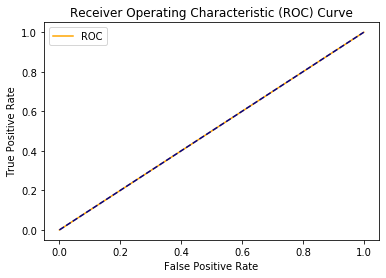

total objects= 1327
train objects= 796
test objects= 531
initial feature length 3
total no of queries  2
feature length 5
train length 791
accuracy = 83.9924670433145
confusion matrix [[446  85]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 83.9924670433145
confusion matrix [[446  85]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 83.9924670433145
confusion matrix [[446  85]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 83.9924670433145
confusion matrix [[446  85]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 83.9924670433145
confusion matrix [[446  85]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 83.9924670433145
confusion matrix [[446  85]
 [  0   0]]
total no of queries  0
feature length 5
train length 791
accuracy = 83.9924670433145
confusion matrix [[446  85]
 [  0   0]]
total no of queries  0
feature length 5
tra

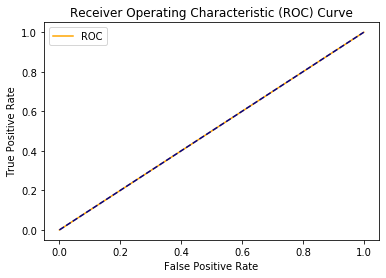

In [10]:
t_rel = 1 # threshold for q_relative criteria
kern = 1.0*RBF(1.0)
auc=[]
ffpr=[]
ttpr=[]

for j in range(10):
    gpc = GaussianProcessClassifier(kernel=kern,random_state=0)

    #dividing the total dataset into 60% training and 40% test
    total_no = len(total_data_objects)
    print("total objects=",total_no)
    train_no=round(0.6*total_no)
    print("train objects=",train_no)
    test_no=round(0.4*total_no)
    print("test objects=",test_no)

    X_test=[]
    Y_test=[]
    train_objects= []

    #for taking two normal and one abnormal as new train to GPClassifier.
    feature_train = []
    label_train = []
    ab=0
    n=0
    
    np.random.shuffle(total_data_objects)
    for i in range(train_no):
        if total_data_objects[i].label == -1 and n < 2:
            feature_train.append(total_data_objects[i].weights_data)
            label_train.append(total_data_objects[i].label)
            n+=1
        elif total_data_objects[i].label == 1 and ab < 1:
            feature_train.append(total_data_objects[i].weights_data)
            label_train.append(total_data_objects[i].label)
            ab+=1
        else :
            train_objects.append(total_data_objects[i])

    for i in range(train_no,total_no):
        X_test.append(total_data_objects[i].weights_data)
        Y_test.append(total_data_objects[i].label)

    feature_train = np.asarray(feature_train)
    label_train = np.asarray(label_train).reshape(-1,1)
    X_test=np.asarray(X_test)
    Y_test=np.asarray(Y_test)

    print("initial feature length",len(feature_train))
    for val in range(10): 
        q=0
        new_objects = []
        # training the objects
        for i in range(len(train_objects)):
            mu_s,cov_s = posterior_predictive(train_objects[i].weights_data.reshape(1,len(train_objects[i].weights_data)), feature_train, label_train) #giving input to gp regression

            q_rel = min(2*abs(mu_s),2/abs(np.sqrt(cov_s)))  # calculating q rel criteria
            if q_rel < t_rel:    # if q_rel is less than given threshold then give the clip to domain expert
                q+=1
                '''
                print("enter label for clip no: ",train_objects[i].clip_no,"with start time ",train_objects[i].stime," end time ",train_objects[i].etime)
                ll = int(input())   # taking input from user(domain_expert)
                '''

                ll=train_objects[i].label
                feature_train = np.vstack([feature_train,train_objects[i].weights_data]) #adding newly labeled sample to training features
                label_train = np.append(label_train,ll)  # adding new label to training labels
            else:
                new_objects.append(train_objects[i])

        gpc.fit(feature_train,label_train)
        pred_labels=gpc.predict(X_test)
        train_objects.clear()
        print("total no of queries ",q)
        train_objects = new_objects.copy()
        print("feature length",len(feature_train))
        print("train length",len(train_objects))

        #performance
        print("accuracy =",accuracy_score(pred_labels,Y_test)*100)
        print("confusion matrix",confusion_matrix(pred_labels,Y_test))

    auc.append(roc_auc_score(Y_test,pred_labels))
    print('AUC:',auc[j])
    fpr, tpr, thresholds = roc_curve(Y_test,pred_labels)
    ffpr.append(fpr)
    ttpr.append(tpr)
    plot_roc_curve(fpr, tpr)

In [11]:
"""
sum_auc = 0
sum_tpr = 0
sum_fpr = 0
ffpr = np.asarray(ffpr)
print(ffpr)
ttpr= np.asarray(ttpr)
print(ttpr)
for i in range(len(auc)):
    sum_auc += auc[i]
    sum_tpr += ttpr[i]
    sum_fpr += ffpr[i]
"""
print("avg auc score",np.mean(auc))
#plot_roc_curve(np.mean(ffpr),np.mean(ttpr))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
avg auc score 0.5
